In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings('ignore')
%matplotlib inline

In [66]:
#Reading the dataset using pandas 

df = pd.read_csv('Algerian_forest_fires_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [67]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


Just one feature object type found, the feature 'classes'

**DATA CLEANING**

In [68]:
# Descriptive summary
df.describe()



,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


I can see some zeros in the features 'Rain', 'ISI', and 'Region'. 

In [69]:
# Checking values in region 
df['Region'].value_counts()


Region
0    122
1    121
Name: count, dtype: int64

Region have two unique values, that may correspond to two specific locations. So zeros are accepted. 
About Rain and ISI are metrics that could have the value 0. 

So we can said the dataset is cleaning. 

In [70]:
#Knowing the shape 
df.shape

(243, 15)

In [71]:
#Converting all letters to lowercase 
df.columns = df.columns.str.lower()

print(df)

     day  month  year  temperature  rh  ws  rain  ffmc   dmc    dc  isi   bui  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     fwi       classes  reg

In [72]:
#Removing spaces in some column names.
df.columns=df.columns.str.strip()
print(df)

     day  month  year  temperature  rh  ws  rain  ffmc   dmc    dc  isi   bui  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     fwi       classes  reg

In [73]:
# Looking for missing values
df.isnull().sum()

day            0
month          0
year           0
temperature    0
rh             0
ws             0
rain           0
ffmc           0
dmc            0
dc             0
isi            0
bui            0
fwi            0
classes        0
region         0
dtype: int64

No missing values in the dataset

In [74]:
#Looking for duplicates 
df.duplicated().sum()

0

No duplicate values

In [75]:
#Using mean to zeros in the dataset
df['rain']=df['rain'].replace(0,df['rain'].mean() )
df['isi']=df['isi'].replace(0,df['isi'].mean() )
df['region']=df['region'].replace(0,df['region'].mean() )


In [76]:
df.describe()

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,1.180552,77.842387,14.680658,49.430864,4.820451,16.690535,7.035391,0.747938
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,1.875584,14.349641,12.393040,47.665606,4.108503,14.228421,7.440568,0.251545
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.100000,28.600000,0.700000,6.900000,0.100000,1.100000,0.000000,0.497942
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.700000,71.850000,5.800000,12.350000,1.500000,6.000000,0.700000,0.497942
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.762963,83.300000,11.300000,33.100000,3.800000,12.400000,4.200000,0.497942
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.762963,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


<Axes: >

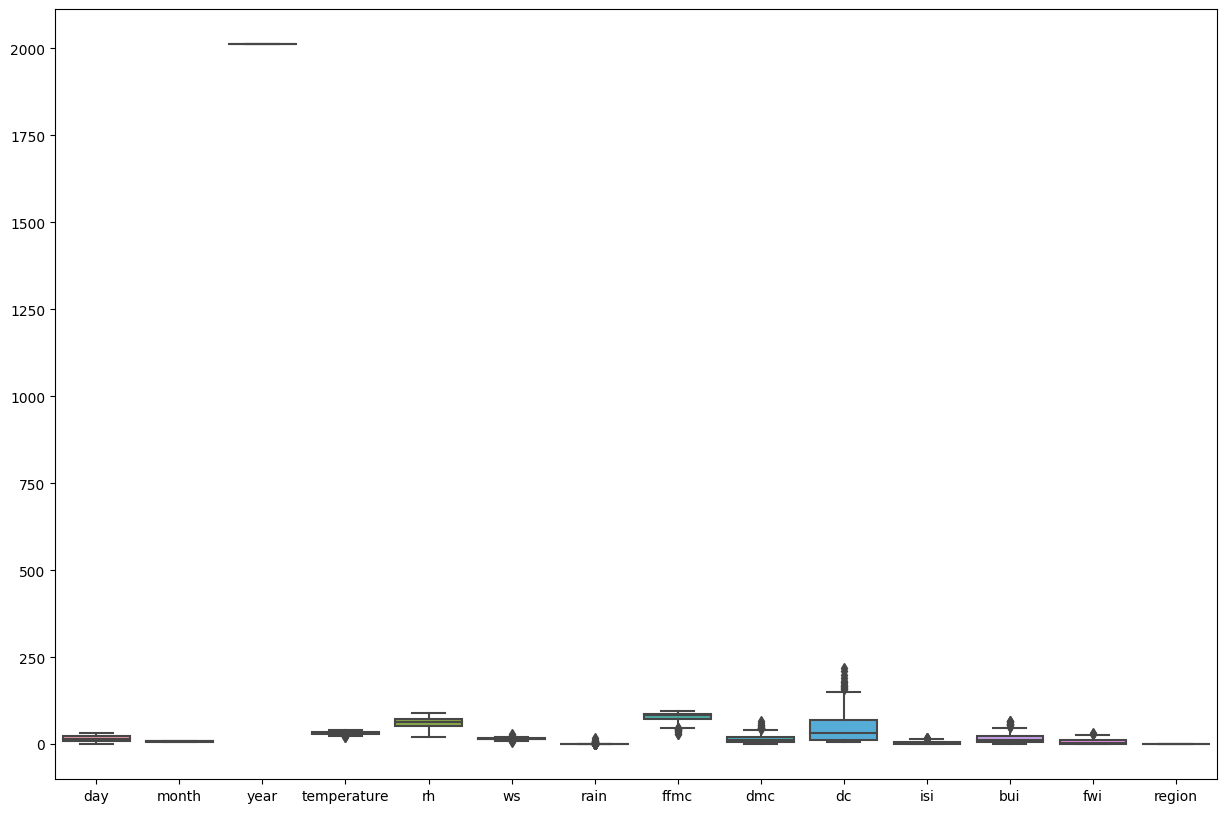

In [77]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

**ENCODING**

In [78]:
#Cheking values for the feature 'classes' 
df['classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [79]:
#Checking values  
df['classes']=df.classes.str.strip()
df['classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [80]:
#Cheking changes were succesfully done 
df['classes'].value_counts()


classes
fire        137
not fire    106
Name: count, dtype: int64

In [81]:
#Encoding 'classes' with one hot encoding
label_encoder = LabelEncoder()

# Fit and transorm classes feature
df['classes_encoded'] = label_encoder.fit_transform(df['classes'])

# Printing df 
print(df)



     day  month  year  temperature  rh  ws       rain  ffmc   dmc    dc  \
0      1      6  2012           29  57  18   0.762963  65.7   3.4   7.6   
1      2      6  2012           29  61  13   1.300000  64.4   4.1   7.6   
2      3      6  2012           26  82  22  13.100000  47.1   2.5   7.1   
3      4      6  2012           25  89  13   2.500000  28.6   1.3   6.9   
4      5      6  2012           27  77  16   0.762963  64.8   3.0  14.2   
..   ...    ...   ...          ...  ..  ..        ...   ...   ...   ...   
238   26      9  2012           30  65  14   0.762963  85.4  16.0  44.5   
239   27      9  2012           28  87  15   4.400000  41.1   6.5   8.0   
240   28      9  2012           27  87  29   0.500000  45.9   3.5   7.9   
241   29      9  2012           24  54  18   0.100000  79.7   4.3  15.2   
242   30      9  2012           24  64  15   0.200000  67.3   3.8  16.5   

          isi   bui  fwi   classes    region  classes_encoded  
0    1.300000   3.4  0.5  not fire 

In [82]:
#Dropping clasess feature object type
df=df.drop(['classes'],axis=1)

**VISUALIZATIONS**

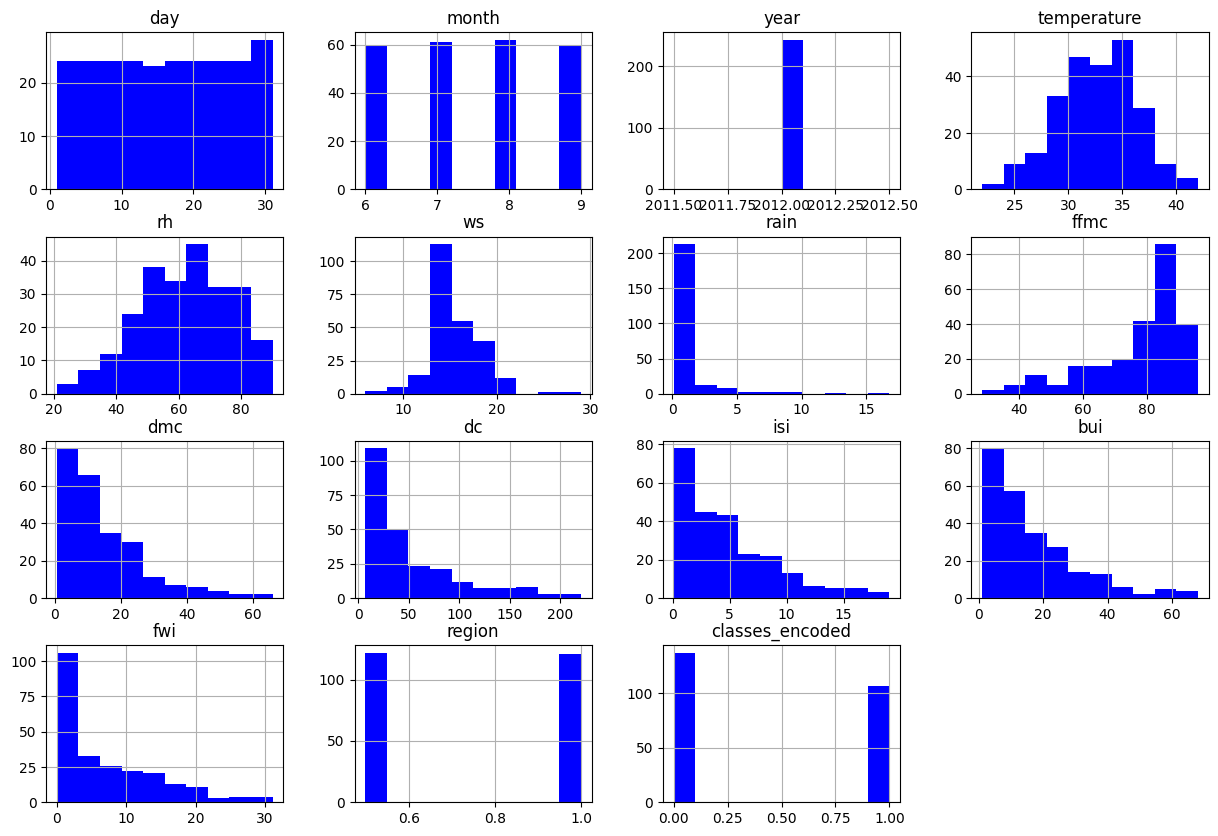

In [83]:
#Histogram for each feature 
df.hist(figsize=(15, 10), color='blue')
plt.show()

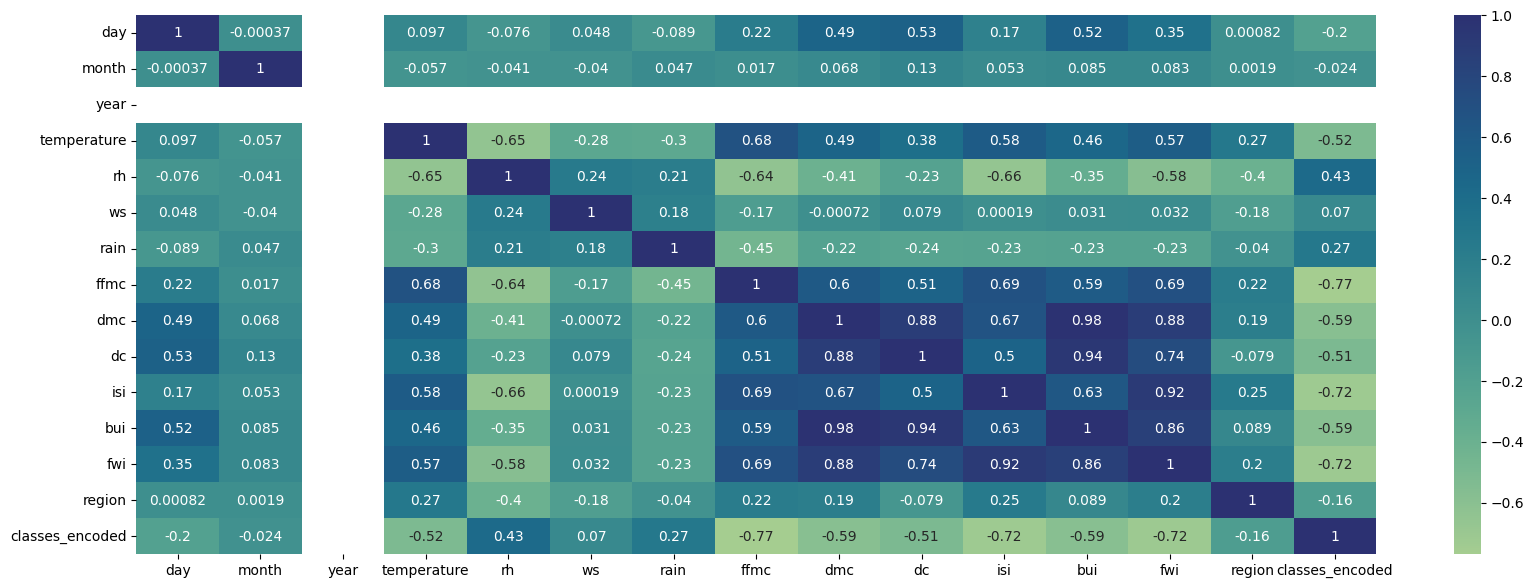

In [84]:
# Heatmap
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='crest')
plt.show()

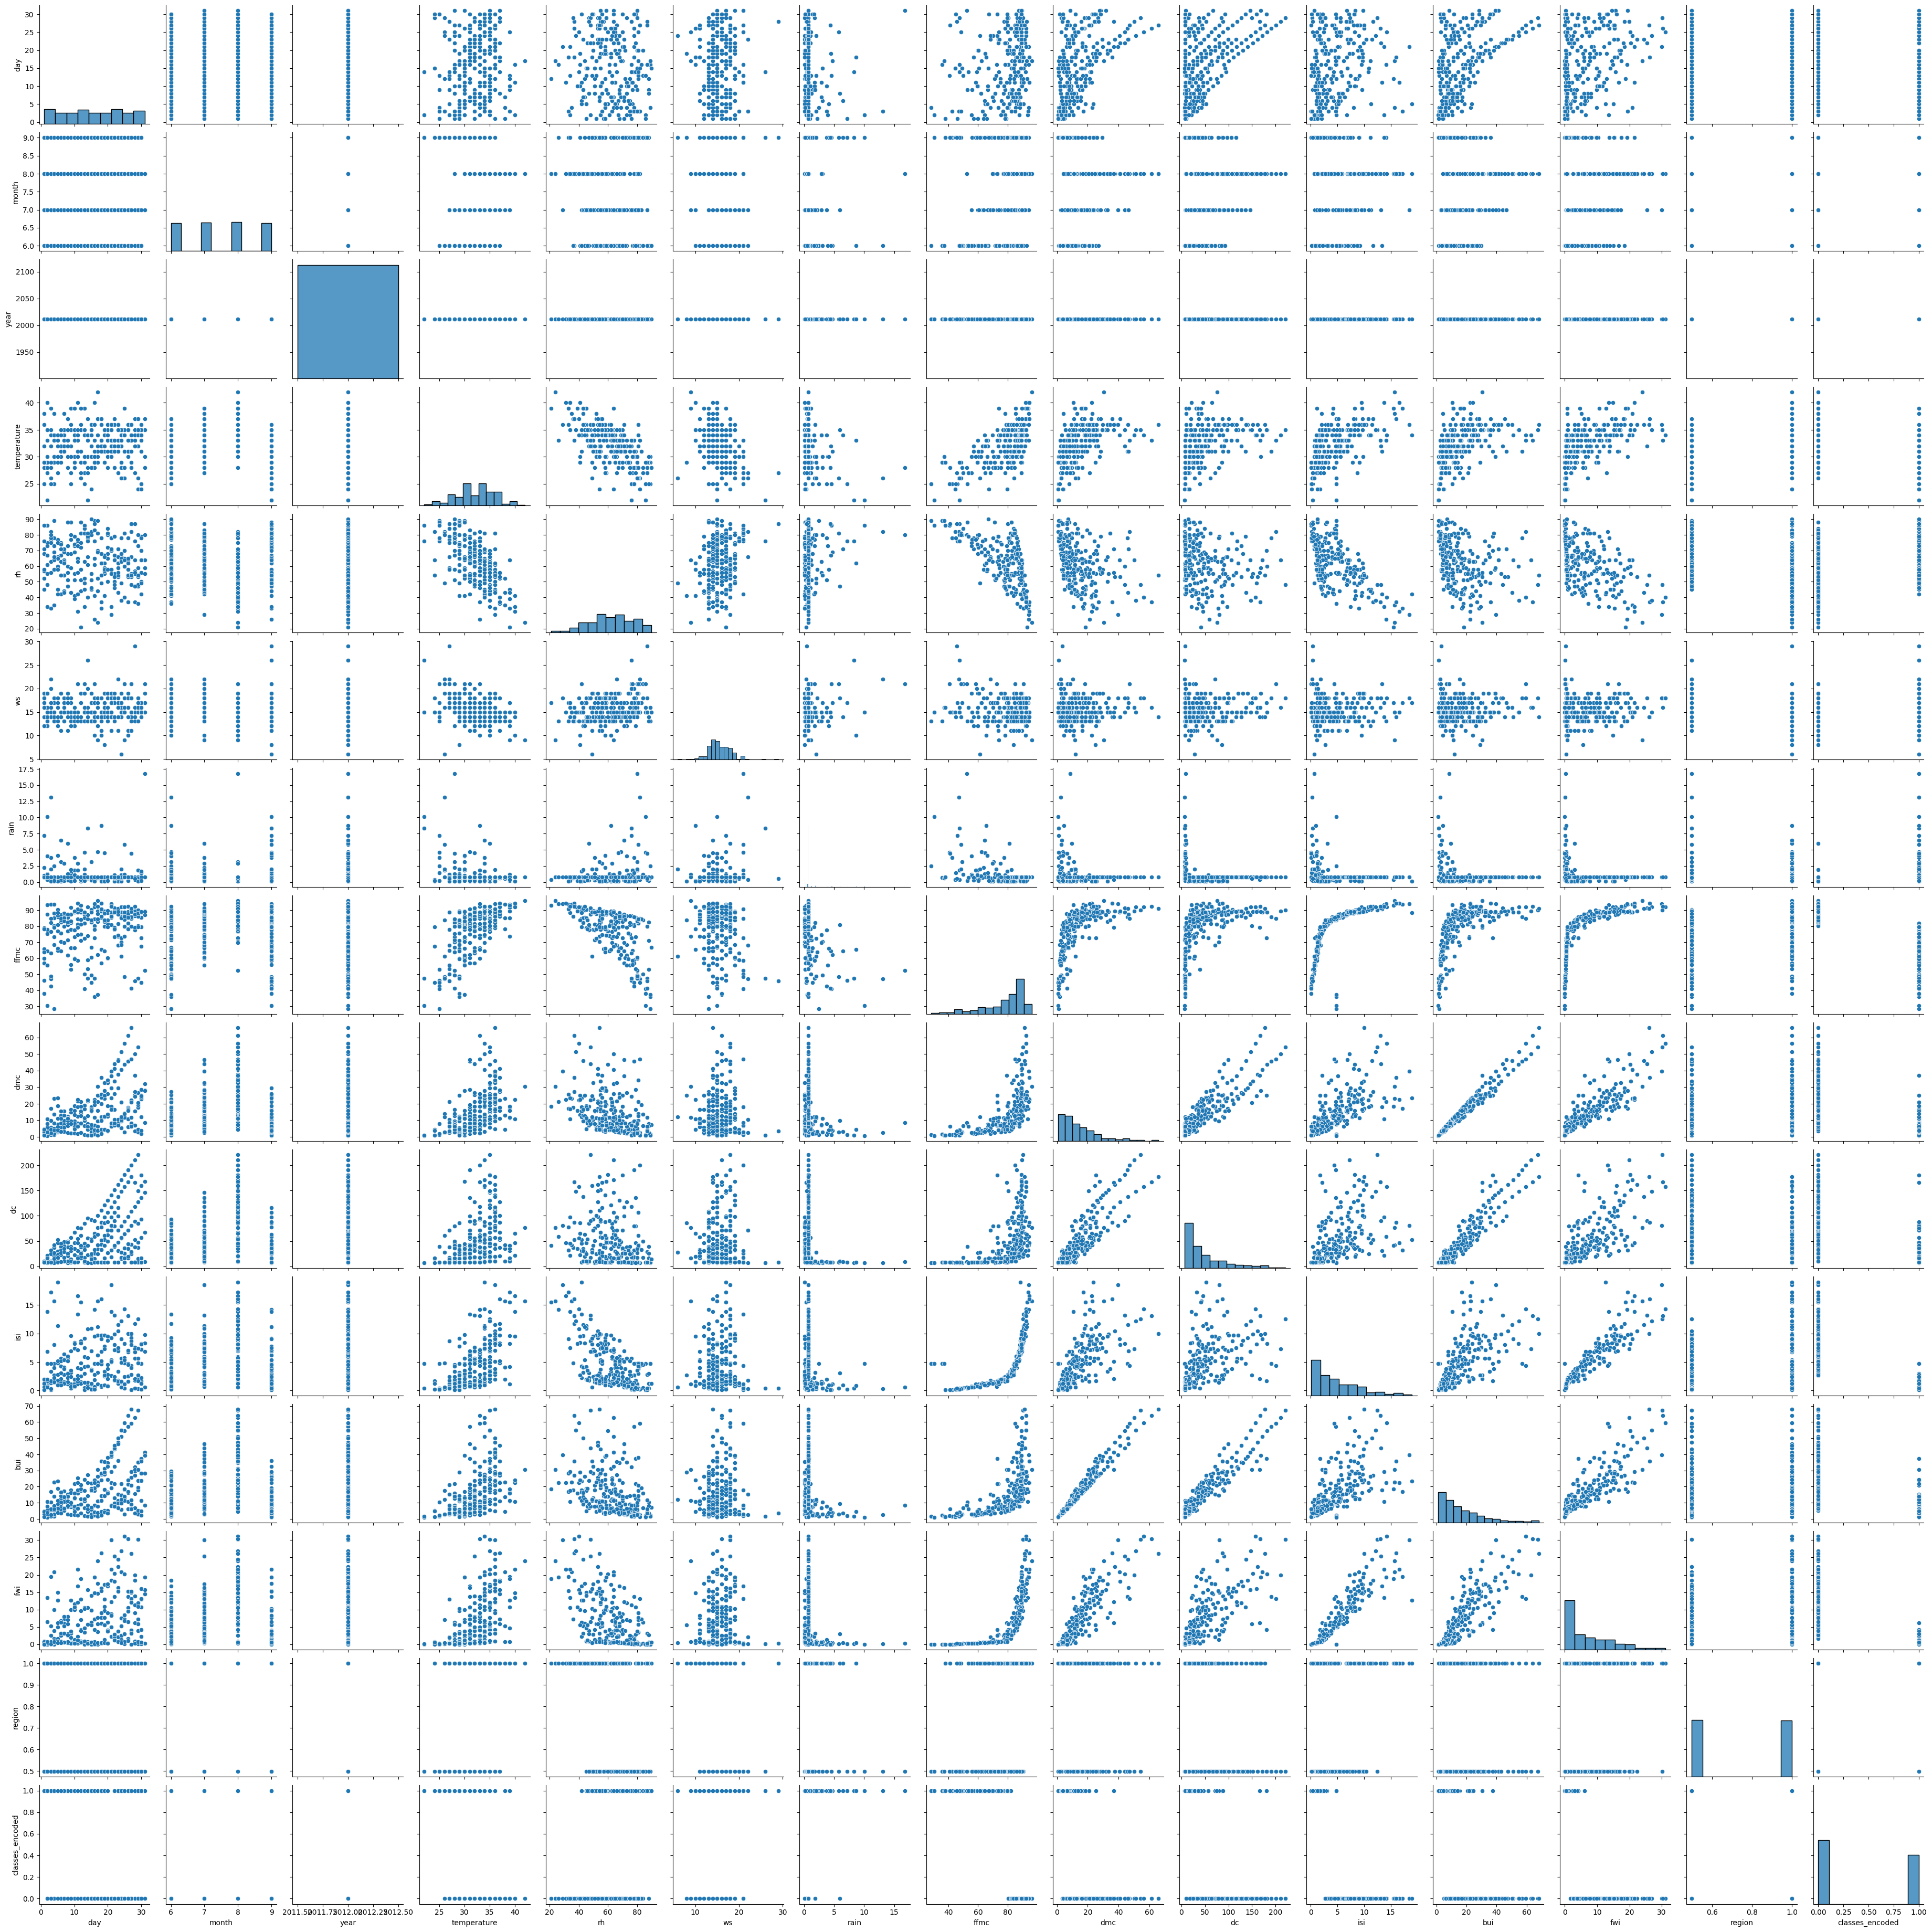

In [85]:
#Looking for detailed correlation in between numeric variables 
sns.pairplot(df)

<pre>
After the visualizations i find: 
</pre>
     -FFMC, DMC, DC, ISI, BUI, and FWI are positively correlated with each other.
     -RH is negative correlated with  DC, ISI, BUI, FFMC, DMC, FWI, and specially strong with temperature feature. 
     -There is a negative correlation in between rain feature and the following features:  DC, ISI, FFMC, BUI, DMC, and FWI.

**MODEL DEVELOPMENT AND ANALYSIS**

In [86]:
# split the data into two parts
X=df.drop('fwi',axis=1)
y=df['fwi']

In [87]:
X.head()

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,region,classes_encoded
0,1,6,2012,29,57,18,0.762963,65.7,3.4,7.6,1.300000,3.4,0.497942,1
1,2,6,2012,29,61,13,1.300000,64.4,4.1,7.6,1.000000,3.9,0.497942,1
2,3,6,2012,26,82,22,13.100000,47.1,2.5,7.1,0.300000,2.7,0.497942,1
3,4,6,2012,25,89,13,2.500000,28.6,1.3,6.9,4.742387,1.7,0.497942,1
4,5,6,2012,27,77,16,0.762963,64.8,3.0,14.2,1.200000,3.9,0.497942,1


In [88]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: fwi, Length: 243, dtype: float64

In [89]:
# Splitting data into training (60%), testing (20%), and unseen data (20%)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_unseen, y_test, y_unseen = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [90]:
# Checking dimensions of the sets
print("Dimensions")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("X_unseen:", X_unseen.shape)

Dimensions
X_train: (145, 14)
X_test: (49, 14)
X_unseen: (49, 14)


MULTIPLE LINEAR REGRESSION: 

In [91]:
# Creating the regression model
linear_model = LinearRegression()

# Model trainning 
linear_model.fit(X_train, y_train)

# Predicting with the model
y_pred_linear = linear_model.predict(X_test)




POLYNOMIAL REGRESSION:

In [92]:
# Polynomial regression model
poly = PolynomialFeatures(degree=2)  
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

REGULARIZATION TECHNIQUES 

RIDGE

In [93]:
from sklearn.linear_model import Ridge, Lasso

# Creating Ridge model 
ridge_model = Ridge(alpha=1.0)

# Model trainning
ridge_model.fit(X_train, y_train)

# Predicting with the model
y_pred_ridge = ridge_model.predict(X_test)


LASSO

In [94]:
# Creating Lasso model 
lasso_model = Lasso(alpha=1.0)

# Model Trainning
lasso_model.fit(X_train, y_train)

# Predicting with the model
y_pred_lasso = lasso_model.predict(X_test)


CROSS-VALIDATION AND HYPERPARAMETER TUNING 

In [95]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Cross-validation 
cv_scores_linear = cross_val_score(linear_model, X_train, y_train, cv=5)
print("Cross-validation scores: ", cv_scores_linear)
print("Mean CV score: ", cv_scores_linear.mean())


Cross-validation scores:  [0.97535615 0.82383169 0.9698849  0.9692648  0.95447972]
Mean CV score:  0.9385634499468936


In [96]:
# parameters for GridSearch
parameters_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# GridSearch for Ridge 
grid_ridge = GridSearchCV(Ridge(), parameters_grid, cv=5)
grid_ridge.fit(X_train, y_train)

print("Best parameters for Ridge: ", grid_ridge.best_params_)
print("Best CV score: ", grid_ridge.best_score_)

Best parameters for Ridge:  {'alpha': 10.0}
Best CV score:  0.9394795192183638


**MODEL EVALUATION AND TESTING**

EVALUATION TO LINEAR MODEL 

In [97]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


print(f'R2 Score: {r2_score(y_test, y_pred_linear)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_linear)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_linear)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_linear))}')


R2 Score: 0.9806300612224564
MAE: 0.7200346647351723
MSE: 1.261828966846333
RMSE: 1.1233116071893554


EVALUATION TO POLYNOMIAL REGRESSION

In [98]:
print(f'R2 Score: {r2_score(y_test, y_pred_poly)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_poly)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_poly)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly))}')

R2 Score: 0.996355134681675
MAE: 0.34460868903872927
MSE: 0.23743991613685617
RMSE: 0.4872780685982657


ANALYSIS RESULTS

When comparing the metrics we can see that linear regression model presents better performance results compared to the polynomial regression model. It has a higher R² Score, getting closer to 1, and this indicates that it better explains the variability in the data. On the other hand, if we analyze the results of the MAE, MSE, and RMSE errors, we can observe that all of these are significantly lower in the linear regression model compared to the polynomial regression model, which suggests that the predictions are more accurate in the linear regression model.

**COMPARISON OF TRUE VALUES AND PREDICTIONS FOR EACH MODEL**

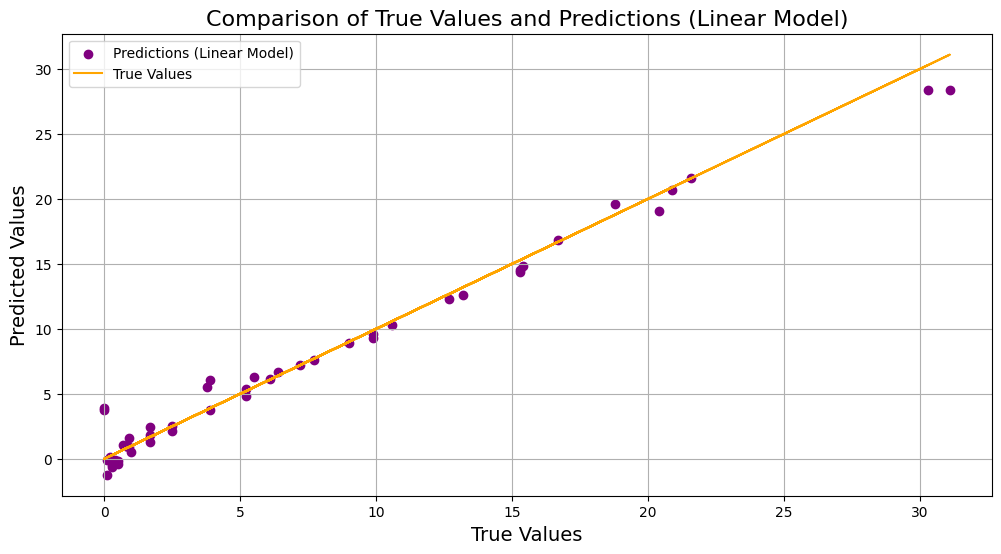

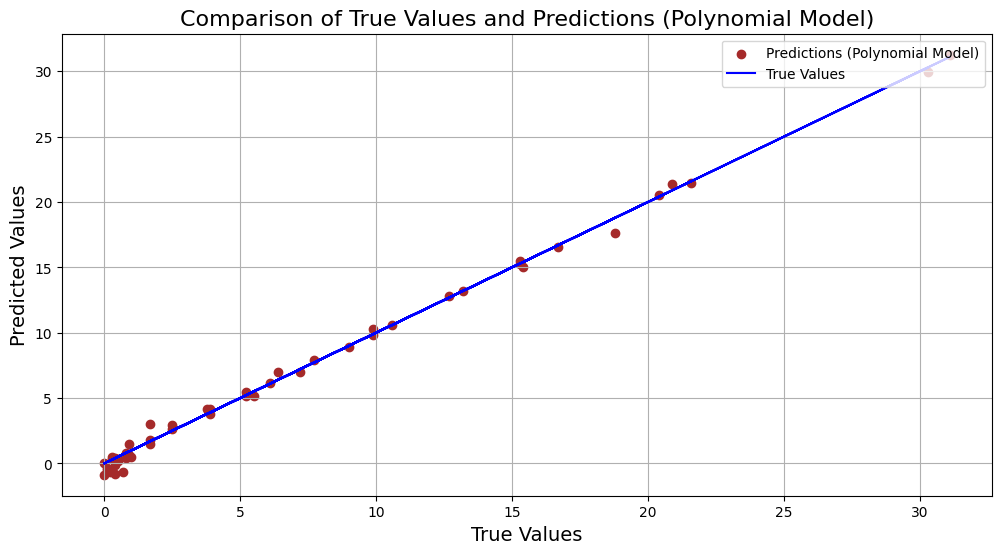

In [99]:
# Predictions for Linear Model
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_linear, color='purple', label='Predictions (Linear Model)')
plt.plot(y_test, y_test, color='orange', label='True Values')
plt.title('Comparison of True Values and Predictions (Linear Model)', fontsize=16)
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Predictions for Polynomial Model
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_poly, color='brown', label='Predictions (Polynomial Model)')
plt.plot(y_test, y_test, color='blue', label='True Values')
plt.title('Comparison of True Values and Predictions (Polynomial Model)', fontsize=16)
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()



SAVING MODELS AS PICKLE FILES 

In [100]:
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(linear_model, file)

with open('poly_model.pkl', 'wb') as file:
    pickle.dump(poly_model, file)


LOADING MODELS SAVED

In [101]:
# Linear regression model
with open('linear_model.pkl', 'rb') as file:
    loaded_linear_model = pickle.load(file)

# Polynomial regression model
with open('poly_model.pkl', 'rb') as file:
    loaded_poly_model = pickle.load(file)

In [102]:
X_poly_unseen = poly.transform(X_unseen)

In [103]:
y_pred_linear_unseen = loaded_linear_model.predict(X_unseen)
y_pred_poly_unseen = loaded_poly_model.predict(X_poly_unseen)

EVALUATING MODELS ON UNSEEN DATA

In [104]:
# Linear model evaluation

print(f'R2 Score: {r2_score(y_unseen, y_pred_linear_unseen)}')

print(f'MAE: {mean_absolute_error(y_unseen, y_pred_linear_unseen)}')

print(f'MSE: {mean_squared_error(y_unseen, y_pred_linear_unseen)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_unseen, y_pred_linear_unseen))}')

R2 Score: 0.9585961121781256
MAE: 0.7625062496542933
MSE: 1.1952438467994448
RMSE: 1.0932720826946258


In [105]:
# Polynomial model evaluation 

print(f'R2 Score: {r2_score(y_unseen, y_pred_poly_unseen)}')

print(f'MAE: {mean_absolute_error(y_unseen, y_pred_poly_unseen)}')

print(f'MSE: {mean_squared_error(y_unseen, y_pred_poly_unseen)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_unseen, y_pred_poly_unseen))}')


R2 Score: 0.6616700611145911
MAE: 0.9617734876214239
MSE: 9.766879366028329
RMSE: 3.1252006921201603


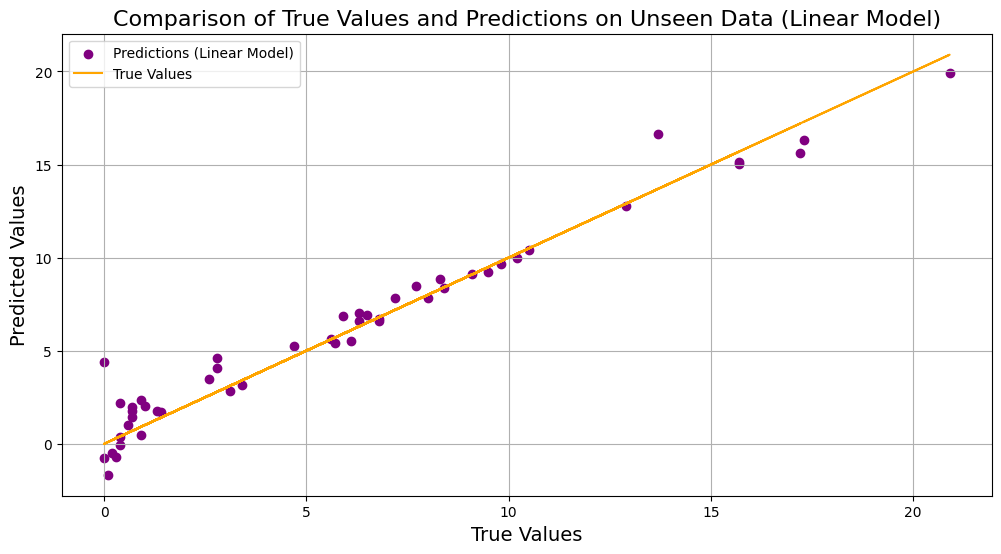

In [106]:
plt.figure(figsize=(12, 6))
plt.scatter(y_unseen, y_pred_linear_unseen, color='purple', label='Predictions (Linear Model)')
plt.plot(y_unseen, y_unseen, color='orange', label='True Values')
plt.title('Comparison of True Values and Predictions on Unseen Data (Linear Model)', fontsize=16)
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

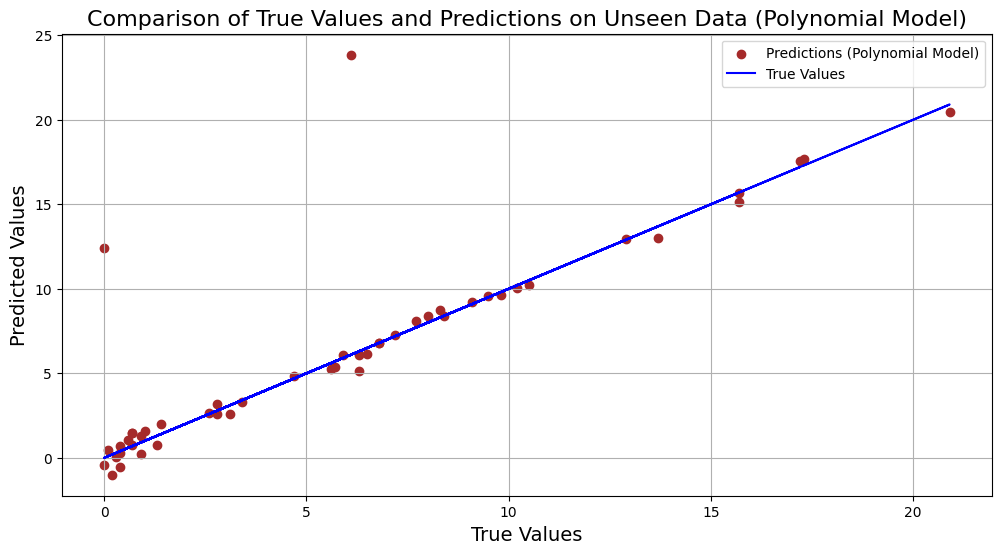

In [107]:
# Visualize polynomial model on unseen data
plt.figure(figsize=(12, 6))
plt.scatter(y_unseen, y_pred_poly_unseen, color='brown', label='Predictions (Polynomial Model)')
plt.plot(y_unseen, y_unseen, color='blue', label='True Values')
plt.title('Comparison of True Values and Predictions on Unseen Data (Polynomial Model)', fontsize=16)
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()